## How to use generate_raw_apd_dataset function
This Jupyter notebook shows how to use the `generate_raw_apd_dataset()` function which returns an xarray dataset. 

Documentation on xarray can be found here: https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html 

APD stands for Avalanche Photodiodes which is a gas puff imaging diagnotic consisiting of 9x10 array of toroidal views of a localized gas puff.

In [1]:
%matplotlib inline
import cmod_functions as cmod

Here we're going to extract a shot and display the contents of the dataset. We set `subtract_background = True` to get rid of the offset when no light emission from the gas-puff hasn't been detected. To get the real data, set this to `False`. 

In [2]:
shot_number = 1160616018

ds = cmod.generate_raw_apd_dataset(shot_number=shot_number, time_start=None, time_end=None, subtract_background=True)

In [3]:
ds

<xarray.Dataset>
Dimensions:  (y: 10, x: 9, time: 782960)
Coordinates:
    R        (y, x) float32 88.03 88.43 88.82 89.07 ... 89.9 90.29 90.68 91.05
    Z        (y, x) float32 -4.285 -4.26 -4.264 -4.268 ... -0.802 -0.802 -0.802
  * time     (time) float64 1.104 1.104 1.104 1.104 ... 1.496 1.496 1.496 1.496
Dimensions without coordinates: y, x
Data variables:
    frames   (y, x, time) float64 -0.00328 -0.00328 -0.011 ... nan nan nan

We are working with labelled data in xarray, so we call the data variable using strings. 

x and y refer to the locaton of the desired pixel.
 * If [x,y] = [0,0], this means it'll index the R and Z positions as, R[0,0], Z[0,0]. This will refer to the diode at the lowest, inner-most position (towards the separatrix). 
* If [x,y] =  [8,9], this mean it'll index the R and Z positions as, R[8,9], Z[8,9]. This will refer to the diode at the upper, outer-most position (towards the wall shadow).

`isel()` utilises indexing a long a specific dimension:  https://docs.xarray.dev/en/stable/generated/xarray.Dataset.isel.html

The `plot()` functionality of xarray uses `matplotlib` as a wrapper: https://docs.xarray.dev/en/latest/user-guide/plotting.html


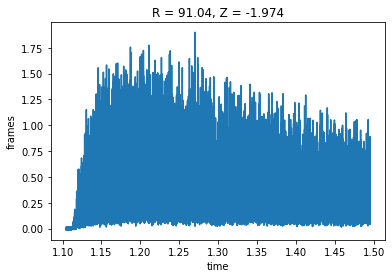

In [9]:
# We use strings to call the data variables.
frames = ds['frames']

# Now we're going to plot data from a specific pixel.
dataset = frames.isel(x=8, y=6)

dataset.plot()


Sometimes, you will see a bunch of `nan` values - this is because the function has been created to remove any dead pixels. Nothing will be plotted because of this, so don't panic if you see a blank plot.

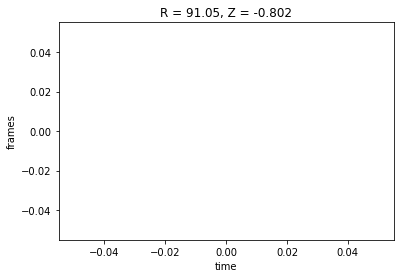

In [10]:
# Dead pixel
dataset = frames.isel(x=8, y=9)

dataset.plot()

We can also do a time slice using `sel()` by specifying the `time` dimension: https://xarray.pydata.org/en/stable/generated/xarray.Dataset.sel.html

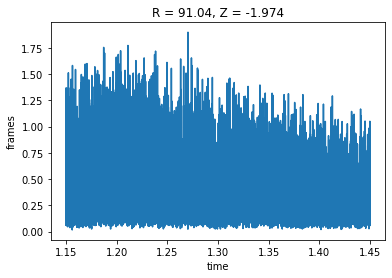

In [18]:
dataset = (frames.isel(x=8, y=6)).sel(time=slice(1.15,1.45))

dataset.plot()

We can calculate mean and standard deviation of the above dataset. You can see that this returns the values as a data array with coordinates.

In [23]:
mean = dataset.mean('time')
standard_deviation = dataset.std('time')

print(mean, standard_deviation)

<xarray.DataArray 'frames' ()>
array(0.3196442)
Coordinates:
    R        float32 91.04
    Z        float32 -1.974 <xarray.DataArray 'frames' ()>
array(0.21582931)
Coordinates:
    R        float32 91.04
    Z        float32 -1.974


You can print these values as a numpy array by doing:

In [29]:
print(mean.values, standard_deviation.values)

0.3196441994636146 0.21582931048081339
